# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [31]:
data, target, coef = datasets.make_regression(n_features = 2,
                                              n_informative = 1,
                                              n_targets = 1, 
                                              noise = 5.,
                                              coef = True,
                                              random_state = 2)

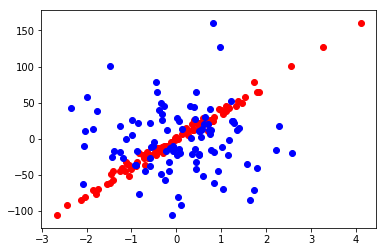

In [7]:
pylab.scatter(list(map(lambda x: x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color = 'b')

In [30]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target, test_size = 0.3)

#### LinearRegression

In [10]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [11]:
print(test_labels)

[ -18.86438755   18.17188553  -10.27758354   12.47089016  -21.47606913
  -91.477377    -12.98848753   27.83791274  -42.44469577   22.2276832
  -71.3715844     0.34799656   24.47584129  -10.29545833  -32.92158843
 -105.77758163   64.70214251   58.26281761  -15.01435792   64.19559505
  -22.33224966   21.20540389  -32.71074998   12.67156468  -10.06708677
  -11.18242389  -45.27502383  126.64909941  -52.37232463  -19.36956003]


In [12]:
print(predictions)

[ -19.41391068   17.95618235   -8.11906407   19.73166808  -18.39851859
  -94.41005118  -16.9883408    22.88464127  -39.88123709   18.10948124
  -71.83095571   -2.15833842   22.75025322  -11.66626813  -34.65077721
 -103.15222706   67.96680409   57.18391722  -10.07180391   70.02897726
  -29.56073808   16.49930205  -44.17899443   13.74077741  -10.56824066
  -13.56725319  -48.64127898  125.85388018  -41.31992567  -32.64937526]


In [13]:
metrics.mean_absolute_error(test_labels, predictions)

3.7739132885097026

In [16]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [18]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [19]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [20]:
coef

array([ 38.07925837,   0.        ])

In [21]:
linear_regressor.coef_

array([ 38.47250451,   0.48046657])

In [22]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.79260594313594279

In [23]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [24]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.47*x1 + 0.48*x2 + -0.79


#### Lasso

In [25]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [26]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666398, std: 1.0170354384993354


In [27]:
print(lasso_regressor.coef_)

[ 37.6026424   0.       ]


In [28]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [29]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.60*x1 + 0.00*x2
